In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from OUR.FocusOnDepth import FocusOnDepth

# select device
device = 'cpu'#torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device: %s" % device)

device: cpu


In [5]:
model = FocusOnDepth((3,384,384), patch_size=16, emb_dim=512, resample_dim=256, read="projection", nhead=8)
model.to(device)
total_params = sum(p.numel() for p in model.parameters())
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_params, total_trainable_params)

90318273 90318273


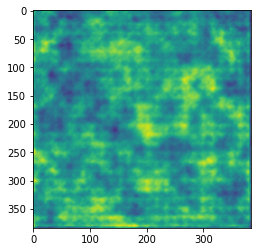

In [6]:
img = torch.Tensor(np.random.random((5,3,384,384))).to(device)
out = model(img)
plt.imshow(out[0].permute(1,2,0).squeeze(-1).detach())
plt.show()

In [10]:
train_dataset = torchvision.datasets.ImageFolder(root="./datasets/inria/frames/1/",
                                     transform=None)

train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=4,
                                          shuffle=True, 
                                          num_workers=2)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: './root/'

In [ ]:
def train(model, epochs):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    for epoch in range(epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
#             # print statistics
#             running_loss += loss.item()
#             if i % 2000 == 1999:    # print every 2000 mini-batches
#                 print('[%d, %5d] loss: %.3f' %
#                       (epoch + 1, i + 1, running_loss / 2000))
#                 running_loss = 0.0
        print('Finished Training')

In [ ]:
# #Validation des rearrange
# tmp = np.array([[1,2,3],[4,5,6],[7,8,9]])
# tmp = np.concatenate([np.concatenate([tmp] * 128, axis=1)]*128)
# tmp = np.stack([tmp,tmp,tmp], axis=0)
# tmp = np.array([tmp])
# tmp = torch.Tensor(tmp)
# tmp.shape

# topatch = Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=3, p2=3)
# tmp2 = topatch(tmp)
# tmp2 = torch.Tensor(tmp2)
# print(tmp2.shape)
# plt.imshow(tmp2[0], aspect='auto')
# plt.colorbar()
# plt.show()

# concat = Rearrange('b (h w) c -> b c h w', c=27, h=(384 // 3), w=(384 // 3))
# tmp3 = concat(tmp2)
# tmp3 = torch.Tensor(tmp3)
# print(tmp3.shape)
# tmp3[0,:4]